In [63]:
import numpy as np
import pandas as pd

In [64]:
data = pd.read_csv("all_emotions.csv")
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.head()

,chrome_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Emotion
0,0.633091,7416.297747,5551.291827,13285.735887,0.002120,0.050476,1
1,0.629568,7135.571471,5653.771579,13191.643371,0.002258,0.052904,1
2,0.619984,7239.265648,5641.048019,13279.137826,0.002707,0.046627,1
3,0.612607,7008.958169,5802.315323,13272.074245,0.002521,0.053835,1
4,0.608243,6997.311810,5518.637359,12649.543486,0.001579,0.045929,2


In [65]:
data['Emotion'].value_counts()

8    192
7    192
6    192
5    192
4    192
3    192
2    192
1     96
Name: Emotion, dtype: int64

In [66]:
data['Emotion'].replace([1,2,3,4,5,6,7,8],[0,0,0,1,1,1,1,1],inplace=True)

In [68]:
print(data['Emotion'].value_counts())
data.isnull().sum()

## No null values

1    960
0    480
Name: Emotion, dtype: int64


chrome_stft           0
spectral_centroid     0
spectral_bandwidth    0
spectral_rolloff      0
rms                   0
zero_crossing_rate    0
Emotion               0
dtype: int64

In [69]:
y = data['Emotion']
X  = data.drop('Emotion', axis = 1)

In [70]:
stats = X.describe(percentiles=[0.005,0.1,0.5,0.95,0.995])
stats

,chrome_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.510108,5560.179301,5054.056185,10841.661162,0.010056,0.069216
std,0.078721,810.351458,568.687643,1503.046336,0.012293,0.018194
min,0.313661,2604.357649,2753.383435,4997.524752,0.000328,0.027717
0.5%,0.338630,3466.714169,3580.707174,7067.841797,0.000492,0.033191
10%,0.401849,4496.379009,4211.973748,8804.885017,0.001661,0.048774
50%,0.512213,5575.320637,5144.059858,11033.019570,0.005693,0.066405
95%,0.635059,6872.654142,5866.470645,13094.623910,0.036313,0.102751
99.5%,0.674390,7300.808950,6150.363477,13732.870027,0.064645,0.129581
max,0.724077,7655.335726,6368.165163,14629.598497,0.088503,0.168519


In [71]:
right_outliers_name = []
right_outliers_value = []

final_outliers = pd.DataFrame()

for i in stats.columns:
            if (stats[i]['max'] / stats[i]['99.5%']) > 1.5:
                right_outliers_name.append(i)
                right_outliers_value.append(outliers[i]['99.5%'])


final_outliers['right_outliers'] = pd.Series(right_outliers_name)
final_outliers['right_outliers_value'] = pd.Series(right_outliers_value)

len(right_outliers_name), len(final_outliers['right_outliers']), len(final_outliers['right_outliers_value'])

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


(0, 0, 0)

In [72]:
left_outliers_name = []
left_outliers_value = []

for i in stats.columns:
    if (stats[i]['min'] / stats[i]['0.5%']) > 1.5:
        left_outliers_name.append(i)
        left_outliers_value.append(outliers[i]['0.5%'])

final_outliers['left_outliers'] = pd.Series(left_outliers_name)
final_outliers['left_outliers_value'] = pd.Series(left_outliers_value) 

len(left_outliers_name), len(final_outliers['left_outliers']), len(final_outliers['left_outliers_value'])
## Null values have also been counted while counting the length

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


(0, 0, 0)

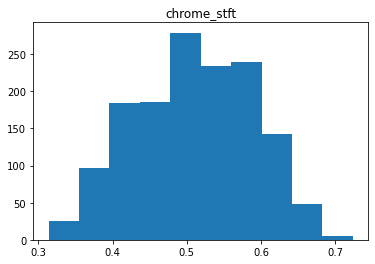

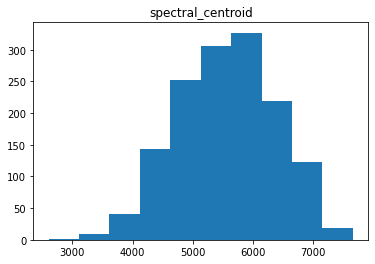

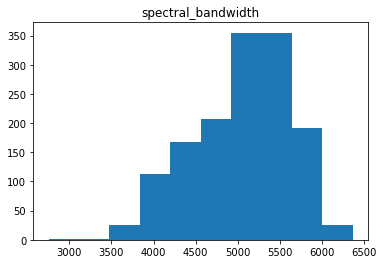

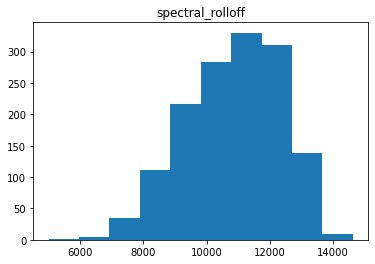

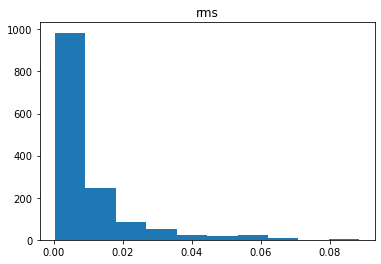

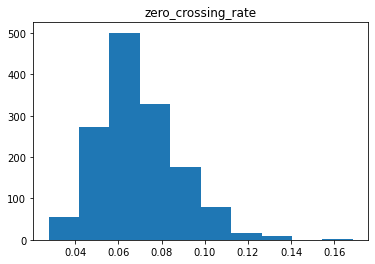

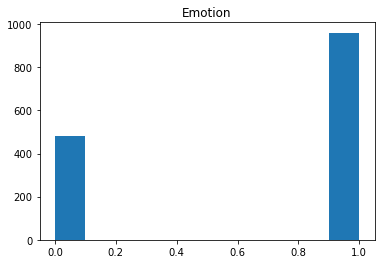

In [130]:
import matplotlib.pyplot as plt
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [73]:
## so there are no right and left outliers

In [74]:
## Transformation

In [75]:
from sklearn.model_selection import train_test_split


# Step 1: Split the data into training and temporary (validation + test) sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)


In [97]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_val)

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, log_loss, brier_score_loss

# Replace 'true_labels' and 'predicted_labels' with your actual data
true_labels = y_val.values
predicted_labels = y_pred

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.6706349206349206
Balanced Accuracy: 0.5907738095238095
Precision (Micro-averaged): 0.6706349206349206
Recall (Micro-averaged): 0.6706349206349206
F1 Score (Micro-averaged): 0.6706349206349206


In [103]:
## fine Tuning

from sklearn.model_selection import RandomizedSearchCV
def random_search_xgboost(model, X_train, y_train):
    param_dist = {
    'n_estimators': [i for i in range(100,700,50)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [i for i in range(2,7,1)]    }

# Create a randomized search object
    xgb_model = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,  
        scoring='accuracy',
        cv=3,  
        verbose=2    )
    
    # Fit the random search model
    xgb_model.fit(X_train, y_train, verbose = False)

    
    print("Best Parameters: ")
    print(xgb_model.best_params_)
    
    return xgb_model

In [104]:
xgb = xgboost.XGBClassifier()

xgb_fine_tune = random_search_xgboost(xgb, X_val, y_val)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=250, max_depth=6, learning_rate=0.1 ................
[21:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] . n_estimators=250, max_depth=6, learning_rate=0.1, total=   0.5s
[CV] n_estimators=250, max_depth=6, learning_rate=0.1 ................
[21:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . n_estimators=250, max_depth=6, learning_rate=0.1, total=   0.4s
[CV] n_estimators=250, max_depth=6, learning_rate=0.1 ................
[21:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . n_estimators=250, max_depth=6, learning_rate=0.1, total=   0.4s
[CV] n_estimators=200, max_depth=6, learning_rate=0.01 ...............
[21:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  n_estimators=200, max_depth=6, learning_rate=0.01, total=   0.7s
[CV] n_estimators=200, ma

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.1min finished


Best Parameters: 
{'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.2}


In [105]:
xgb_fine_tune.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
xgb_fine_tune = xgboost.XGBClassifier(n_estimators = 150,max_depth = 6, learning_rate = 0.2)
xgb_fine_tune.fit(X_train, y_train)
y_pred_tuned = xgb_fine_tune.predict(X_val)

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [107]:
true_labels = y_val
predicted_labels = y_pred_tuned

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.6904761904761905
Balanced Accuracy: 0.6145833333333334
Precision (Micro-averaged): 0.6904761904761905
Recall (Micro-averaged): 0.6904761904761905
F1 Score (Micro-averaged): 0.6904761904761905


## on test data

In [118]:
true_labels = y_test
predicted_labels = xgb_fine_tune.predict(X_test)

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.6689814814814815
Balanced Accuracy: 0.6091073467834032
Precision (Micro-averaged): 0.6689814814814815
Recall (Micro-averaged): 0.6689814814814815
F1 Score (Micro-averaged): 0.6689814814814815


In [108]:
## Catboost

In [109]:
data.corr()

,chrome_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,Emotion
chrome_stft,1.000000,0.485154,0.805332,0.645287,-0.274051,-0.387343,-0.059709
spectral_centroid,0.485154,1.000000,0.683777,0.927070,-0.220827,0.004410,-0.017476
spectral_bandwidth,0.805332,0.683777,1.000000,0.882915,-0.211020,-0.118694,-0.032221
spectral_rolloff,0.645287,0.927070,0.882915,1.000000,-0.243568,-0.056604,-0.008328
rms,-0.274051,-0.220827,-0.211020,-0.243568,1.000000,0.430388,0.212626
zero_crossing_rate,-0.387343,0.004410,-0.118694,-0.056604,0.430388,1.000000,0.219656
Emotion,-0.059709,-0.017476,-0.032221,-0.008328,0.212626,0.219656,1.000000


In [113]:
import catboost
clf = catboost.CatBoostClassifier()
clf.fit(X_train, y_train, verbose = False)
y_pred_tuned_catboost = clf.predict(X_val)


In [114]:
true_labels = y_val
predicted_labels = y_pred_tuned_catboost

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.7043650793650794
Balanced Accuracy: 0.6145833333333333
Precision (Micro-averaged): 0.7043650793650794
Recall (Micro-averaged): 0.7043650793650794
F1 Score (Micro-averaged): 0.7043650793650794


## on test data

In [115]:
true_labels = y_test
predicted_labels = clf.predict(X_test)

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.6990740740740741
Balanced Accuracy: 0.627141225732775
Precision (Micro-averaged): 0.6990740740740741
Recall (Micro-averaged): 0.6990740740740741
F1 Score (Micro-averaged): 0.6990740740740741


## tuning Catboost

In [116]:

params = {'iterations': [100,200,300,400,500],
          'depth': [4, 5, 6,7,8,9],
          'loss_function': ['Logloss'],
          'leaf_estimation_iterations': [10],
           'eval_metric': ['Logloss'],
          'random_seed': [42],
         'learning_rate':[0.05,0.08,0.1,0.3]
         };

In [120]:

clf_grid_full = GridSearchCV(estimator=clf, param_grid=params, cv=3)
clf_grid_full.fit(X_train, y_train, verbose = False)
clf_grid_full

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025B833A3710>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9],
                         'eval_metric': ['Logloss'],
                         'iterations': [100, 200, 300, 400, 500],
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.05, 0.08, 0.1, 0.3],
                         'loss_function': ['Logloss'], 'random_seed': [42]})

In [122]:
clf_grid_full.best_params_

{'depth': 8,
 'eval_metric': 'Logloss',
 'iterations': 100,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.05,
 'loss_function': 'Logloss',
 'random_seed': 42}

In [124]:
clf = catboost.CatBoostClassifier(depth = 8, n_estimators=100, leaf_estimation_iterations=10, learning_rate = 0.05, loss_function ='Logloss')
clf.fit(X_train,y_train, verbose= False)
y_pred_catboost_tuned = clf.predict(X_val)

In [125]:
true_labels = y_val
predicted_labels = y_pred_catboost_tuned

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.7043650793650794
Balanced Accuracy: 0.6205357142857143
Precision (Micro-averaged): 0.7043650793650794
Recall (Micro-averaged): 0.7043650793650794
F1 Score (Micro-averaged): 0.7043650793650794


## on test data

In [126]:
true_labels = y_test
predicted_labels = clf.predict(X_test)

# Calculate the metrics
accuracy_logit_train = accuracy_score(true_labels, predicted_labels)
balanced_accuracy_logit_train = balanced_accuracy_score(true_labels, predicted_labels)
precision_logit_train = precision_score(true_labels, predicted_labels, average='micro')  # Micro-averaged precision
recall_logit_train = recall_score(true_labels, predicted_labels, average='micro')  # Micro-averaged recall
f1_logit_train = f1_score(true_labels, predicted_labels, average='micro')  # Micro-averaged F1 score

# Print the metrics
print(f"Accuracy: {accuracy_logit_train}")
print(f"Balanced Accuracy: {balanced_accuracy_logit_train}")
print(f"Precision (Micro-averaged): {precision_logit_train}")
print(f"Recall (Micro-averaged): {recall_logit_train}")
print(f"F1 Score (Micro-averaged): {f1_logit_train}")

Accuracy: 0.7037037037037037
Balanced Accuracy: 0.6322801674914351
Precision (Micro-averaged): 0.7037037037037037
Recall (Micro-averaged): 0.7037037037037037
F1 Score (Micro-averaged): 0.7037037037037037
